In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(color_codes=True)
pd.read_csv("./report_prob1.csv")

,nums,command,mean,stddev,median,user,system,min,max
0,10,./main < seq_tmp.txt,0.002122,0.001598,0.002048,0.001595,0.001020,0.000000,0.005337
1,11,./main < seq_tmp.txt,0.002557,0.001596,0.002949,0.002006,0.001052,0.000000,0.005329
2,12,./main < seq_tmp.txt,0.002703,0.001797,0.002826,0.002204,0.001080,0.000000,0.007824
3,13,./main < seq_tmp.txt,0.001927,0.001615,0.001408,0.001641,0.000908,0.000000,0.005442
4,14,./main < seq_tmp.txt,0.002216,0.001641,0.002278,0.001720,0.001068,0.000000,0.005577
...,...,...,...,...,...,...,...,...,...
634,9600000,./main < seq_tmp.txt,3.103203,0.015826,3.101530,2.694950,0.403975,3.080371,3.130455
635,9700000,./main < seq_tmp.txt,3.157585,0.094812,3.136101,2.756303,0.396618,3.096793,3.420077
636,9800000,./main < seq_tmp.txt,3.176006,0.015029,3.178919,2.734883,0.436548,3.155280,3.204417
637,9900000,./main < seq_tmp.txt,3.197340,0.018925,3.193439,2.784101,0.408614,3.175601,3.238107


In [81]:
import re

command_prob1_regex = re.compile(r'\.\/main < tests\/seq_prob1_(\d+)\.txt')

def parse_command_prob1(command):
  return int(command_prob1_regex.match(command).group(1))

In [82]:
flat_map = lambda f, xs: [y for ys in xs for y in f(ys)]

benchmark_data = flat_map(lambda run: ([parse_command_prob1(run['command']), time] for time in run['times']), benchmark_raw_data)

In [83]:
df_p1 = pd.DataFrame(data=benchmark_data,columns=['size', 'time'])

In [84]:
df_p1

,size,time
0,60000000,17.720522
1,60000000,17.417717
2,60000000,17.335774
3,60000000,17.633938
4,60000000,17.441459
...,...,...
22102,200,0.001439
22103,200,0.000663
22104,200,0.000789
22105,200,0.001487


[None, None]

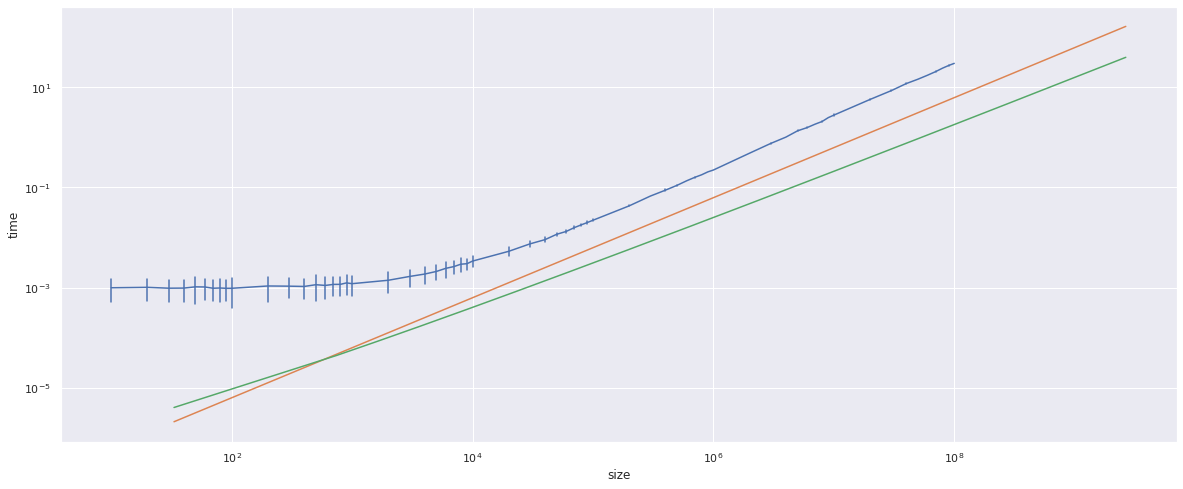

In [85]:
x = np.linspace(10, 100000000, 1000000)
y = (x * np.log2(x)) / 16000000
y2 = x / 2500000
x = x * np.log2(x)

plt.figure(figsize=(20, 8))
ax = sns.lineplot(x="size", y="time", data=df_p1, err_style="bars", ci="sd")
ax.plot(x,y)
ax.plot(x,y2)
ax.set(xscale="log", yscale="log")